<a href="https://colab.research.google.com/github/kenyarodriguezmor/Estadistica2025B/blob/main/C%C3%B3digo_tarea_1_estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dimensiones del dataset: (934, 4)


,Father_height,Mother_height,Child_height,gender
0,78.5,67.0,73.2,1
1,78.5,67.0,69.2,0
2,78.5,67.0,69.0,0
3,78.5,67.0,69.0,0
4,75.5,66.5,73.5,1



Estadísticos descriptivos:


,Child_height,Father_height,Mother_height
count,934.000000,934.000000,934.000000
mean,66.745931,69.197109,64.089293
std,3.579251,2.476479,2.290886
min,56.000000,62.000000,58.000000
25%,64.000000,68.000000,63.000000
50%,66.500000,69.000000,64.000000
75%,69.700000,71.000000,65.875000
max,79.000000,78.500000,70.500000



Matriz de correlaciones (Pearson):


,Child_height,Father_height,Mother_height
Child_height,1.000000,0.266039,0.201322
Father_height,0.266039,1.000000,0.060366
Mother_height,0.201322,0.060366,1.000000


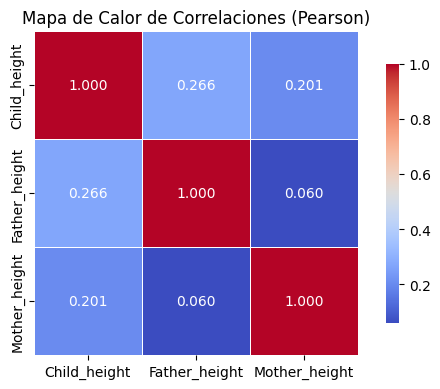


Promedios por género (0=hija, 1=hijo):


,count,mean,std
gender,,,
0,453,64.103974,2.355653
1,481,69.234096,2.623905


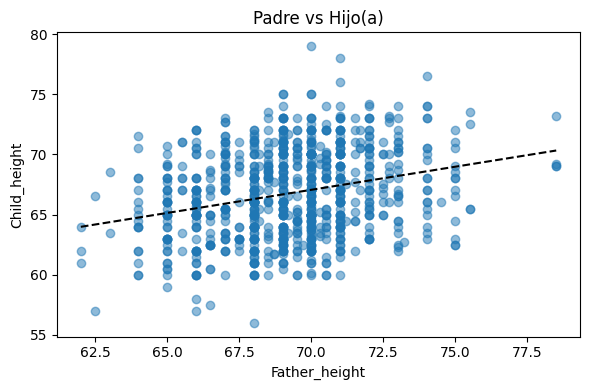

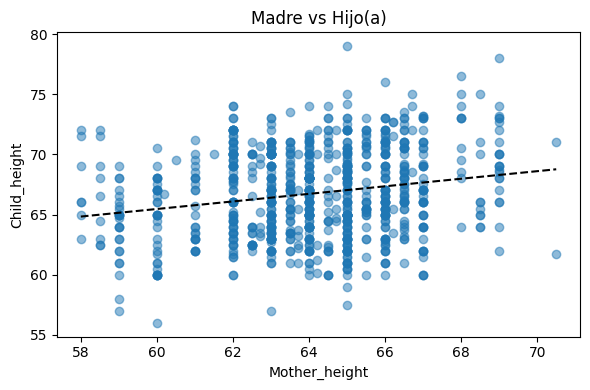

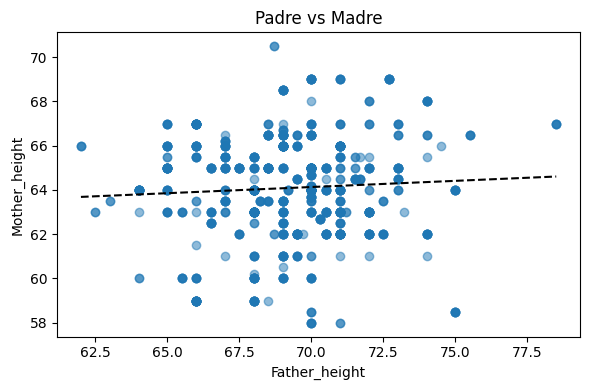

                            OLS Regression Results                            
Dep. Variable:           Child_height   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     540.3
Date:                Tue, 28 Oct 2025   Prob (F-statistic):          3.38e-203
Time:                        01:08:18   Log-Likelihood:                -2044.6
No. Observations:                 934   AIC:                             4097.
Df Residuals:                     930   BIC:                             4117.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.5212      2.727      6.058

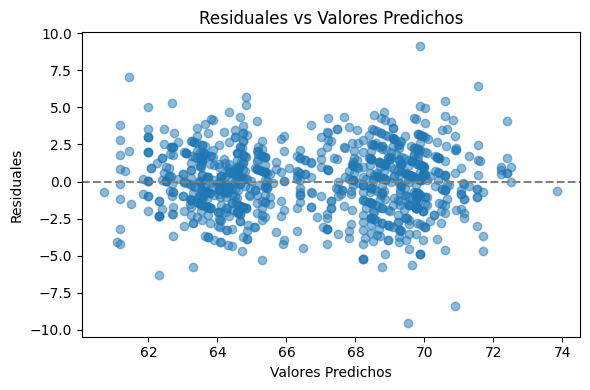

Prueba de Shapiro-Wilk para normalidad de residuos: p-value = 0.0181
Prueba de Breusch-Pagan (homocedasticidad): p-value = 0.0690

Predicción para hija: 64.27 pulgadas
Predicción para hijo: 69.49 pulgadas

Tabla ANOVA del modelo:


,df,sum_sq,mean_sq,F,PR(>F)
Father_height,1.0,845.970289,845.970289,180.535787,9.585832e-38
Mother_height,1.0,411.742112,411.742112,87.868554,5.159923e-20
gender,1.0,6337.112264,6337.112264,1352.382658,1.678202e-183
Residual,930.0,4357.874875,4.685887,NaN,NaN


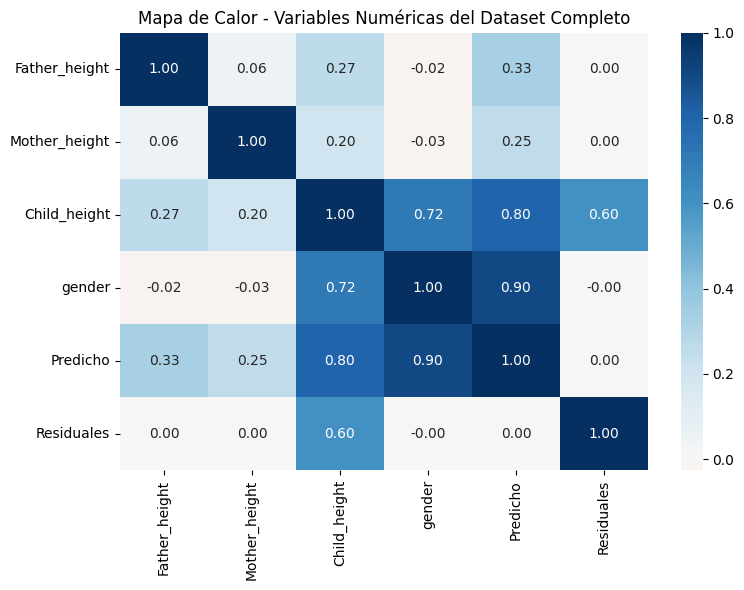

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr, shapiro
from statsmodels.stats.api import het_breuschpagan

# Datos
url = "https://raw.githubusercontent.com/kenyarodriguezmor/Estadistica2025B/main/Galton_Family_Heights.csv"
df = pd.read_csv(url)
df.columns = [c.strip() for c in df.columns]   # limpiar espacios en nombres
df = df.dropna()  # eliminar filas con valores faltantes
print("Dimensiones del dataset:", df.shape)
display(df.head())

# Estadísticos descriptivos
print("\nEstadísticos descriptivos:")
display(df[['Child_height','Father_height','Mother_height']].describe())

# Correlaciones
corr = df[['Child_height','Father_height','Mother_height']].corr(method='pearson')
print("\nMatriz de correlaciones (Pearson):")
display(corr)

# Mapa de calor de correlaciones
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f", square=True, linewidths=0.5,
            cbar_kws={"shrink": .8})
plt.title("Mapa de Calor de Correlaciones (Pearson)", fontsize=12)
plt.tight_layout()
plt.show()

# Promedios por género
group_stats = df.groupby('gender')['Child_height'].agg(['count','mean','std'])
print("\nPromedios por género (0=hija, 1=hijo):")
display(group_stats)

# Diagramas de dispersión
def scatter_with_fit(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(6,4))
    plt.scatter(x, y, alpha=0.5)
    m, b = np.polyfit(x, y, 1)
    xs = np.linspace(x.min(), x.max(), 100)
    plt.plot(xs, m*xs + b, color='black', linestyle='--')
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()

scatter_with_fit(df['Father_height'], df['Child_height'], 'Father_height', 'Child_height', 'Padre vs Hijo(a)')
scatter_with_fit(df['Mother_height'], df['Child_height'], 'Mother_height', 'Child_height', 'Madre vs Hijo(a)')
scatter_with_fit(df['Father_height'], df['Mother_height'], 'Father_height', 'Mother_height', 'Padre vs Madre')

# Regresión lineal múltiple: Child ~ Father + Mother + gender
modelo_lineal = ols('Child_height ~ Father_height + Mother_height + gender', data=df).fit()
print(modelo_lineal.summary())

# Diagrama de dispersión ajustado y línea de regresión (usando predicciones)
df['Predicho'] = modelo_lineal.fittedvalues
df['Residuales'] = modelo_lineal.resid

plt.figure(figsize=(6,4))
plt.scatter(df['Predicho'], df['Residuales'], alpha=0.5)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Residuales vs Valores Predichos')
plt.tight_layout()
plt.show()

# Pruebas de supuestos de regresión
# Normalidad de residuos
_, p_shapiro = shapiro(df['Residuales'])
print(f"Prueba de Shapiro-Wilk para normalidad de residuos: p-value = {p_shapiro:.4f}")

# Homocedasticidad (Breusch-Pagan)
_, p_bp, _, _ = het_breuschpagan(df['Residuales'], modelo_lineal.model.exog)
print(f"Prueba de Breusch-Pagan (homocedasticidad): p-value = {p_bp:.4f}")

# Predicciones ejemplo (padre=69, madre=65, hija/hijo)
padre = 69
madre = 65
pred_hija = modelo_lineal.predict(pd.DataFrame({'Father_height':[padre],'Mother_height':[madre],'gender':[0]}))[0]
pred_hijo = modelo_lineal.predict(pd.DataFrame({'Father_height':[padre],'Mother_height':[madre],'gender':[1]}))[0]
print(f"\nPredicción para hija: {pred_hija:.2f} pulgadas")
print(f"Predicción para hijo: {pred_hijo:.2f} pulgadas")

# Tabla ANOVA del modelo
tabla_anova = sm.stats.anova_lm(modelo_lineal)
print("\nTabla ANOVA del modelo:")
display(tabla_anova)

# Mapa de calor extendido (todas las variables numéricas)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', fmt=".2f", center=0)
plt.title("Mapa de Calor - Variables Numéricas del Dataset Completo")
plt.tight_layout()
plt.show()